This notebook demonstrates how agility can be used to get distinct grains and their properties

In [ ]:
from __future__ import annotations

from IPython.core.display import Image

from agility.analysis import GBStructure
from agility.plotting import render_ovito

In [ ]:
gb = GBStructure(
    "ovito",
    "https://raw.githubusercontent.com/ab5424/agility/main/tests/files/STO_polycrystal.lmp",
)
gb.select_particles_by_type(("Sr", "Ti"))
gb.perform_ptm(
    enabled=["bcc"],
    output_orientation=True,
    rmsd_threshold=0.15,
    only_selected=True,
)

In [ ]:
gb.get_distinct_grains(min_grain_size=10)

In [ ]:
from ovito.modifiers import ColorCodingModifier

gb.pipeline.modifiers.append(
    ColorCodingModifier(property="Grain", gradient=ColorCodingModifier.Viridis()),
)
gb.set_analysis()

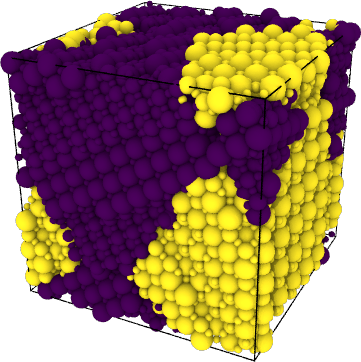

In [ ]:
image = render_ovito(gb.pipeline, res_factor=1)
image.save("figure.png")

Image(filename="figure.png")